In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data = pd.read_csv('HomeC.csv', low_memory=False)
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [4]:
data.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data=data[:-1]
data.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [6]:
#given that the time is in UNIX format, let's check
time_index = pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min')
time_index = pd.DatetimeIndex(time_index)
data = data.set_index(time_index)


In [7]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [8]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [9]:
data.columns = [col.replace(' [kW]', '') for col in data.columns]
data.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [10]:
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)
data.head(5)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,1451624400,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 05:01:00,1451624401,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 05:02:00,1451624402,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000617
2016-01-01 05:03:00,1451624403,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000650
2016-01-01 05:04:00,1451624404,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000783


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          50391

In [12]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [13]:
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          50391

In [15]:
energy_data = data.filter(items=[ 'gen', 'House overall', 'Dishwasher', 'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room', 'Solar'])

sensor_data = data.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])

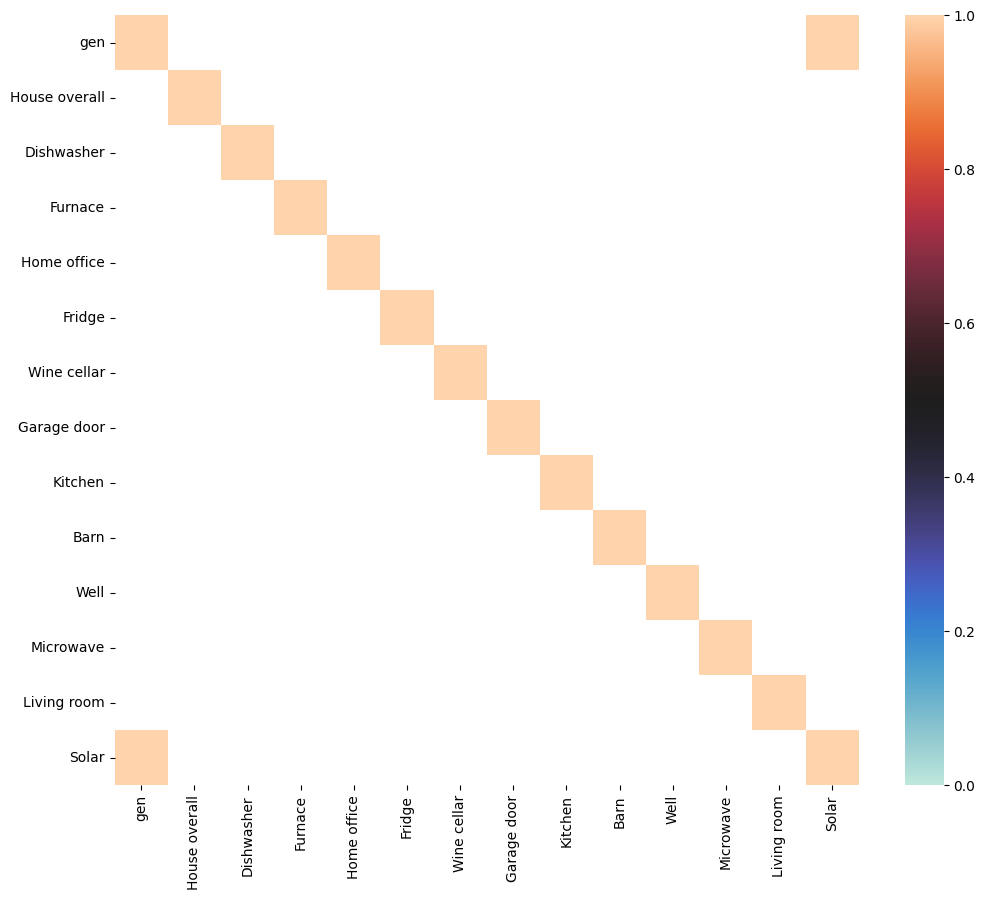

In [16]:
fig = plt.subplots(figsize=(12, 10))
corr = energy_data.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=0, center=0.5)
plt.show()

In [17]:
energy_data.drop(['Solar'], axis=1, inplace=True)

In [18]:
energy_data.head()

,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650
2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650
2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617
2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583


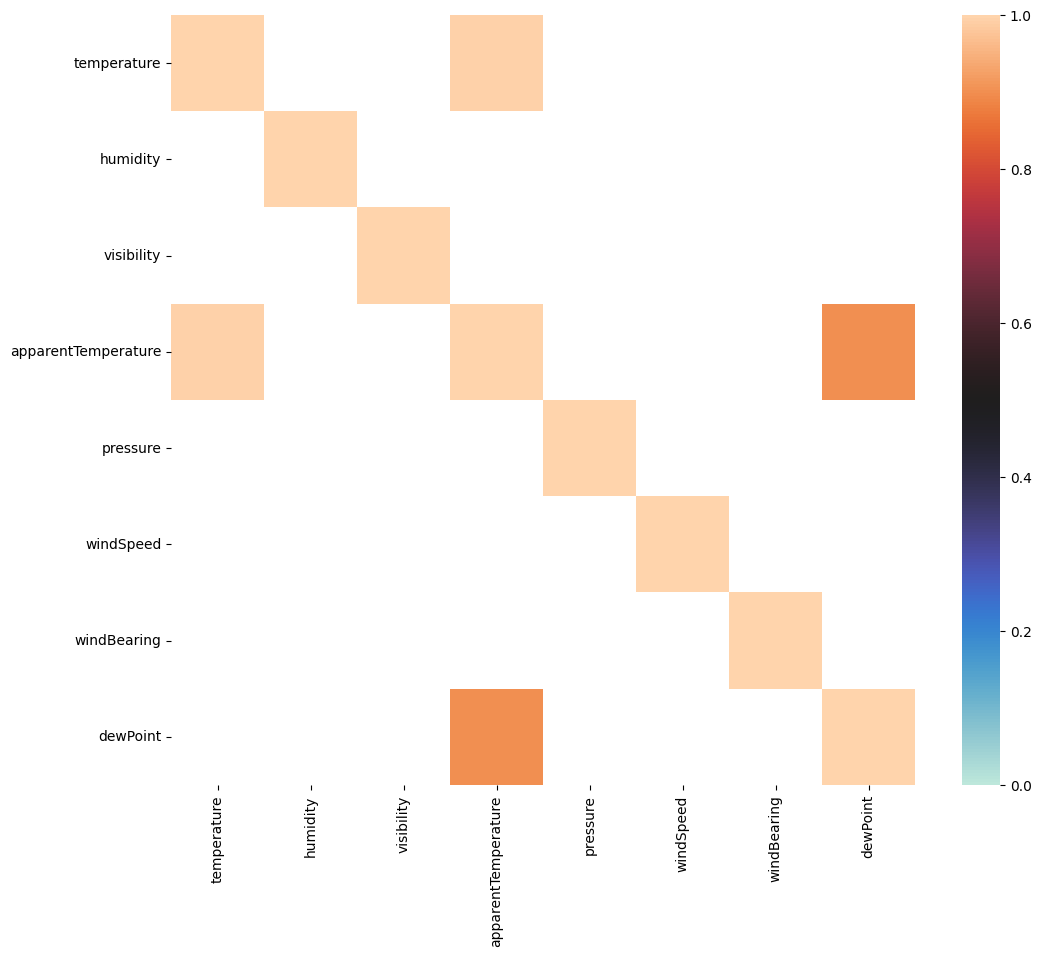

In [19]:
fig = plt.subplots(figsize=(12, 10))
corr = sensor_data.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=0, center=0.5)
plt.show()

In [20]:
sensor_data.drop(['apparentTemperature'], axis=1, inplace=True)

In [21]:
sensor_data.head()

,temperature,humidity,visibility,pressure,windSpeed,windBearing,dewPoint
2016-01-01 05:00:00,36.14,0.62,10.0,1016.91,9.18,282.0,24.4
2016-01-01 05:01:00,36.14,0.62,10.0,1016.91,9.18,282.0,24.4
2016-01-01 05:02:00,36.14,0.62,10.0,1016.91,9.18,282.0,24.4
2016-01-01 05:03:00,36.14,0.62,10.0,1016.91,9.18,282.0,24.4
2016-01-01 05:04:00,36.14,0.62,10.0,1016.91,9.18,282.0,24.4


<Axes: title={'center': 'Overall energy consumption per day'}>

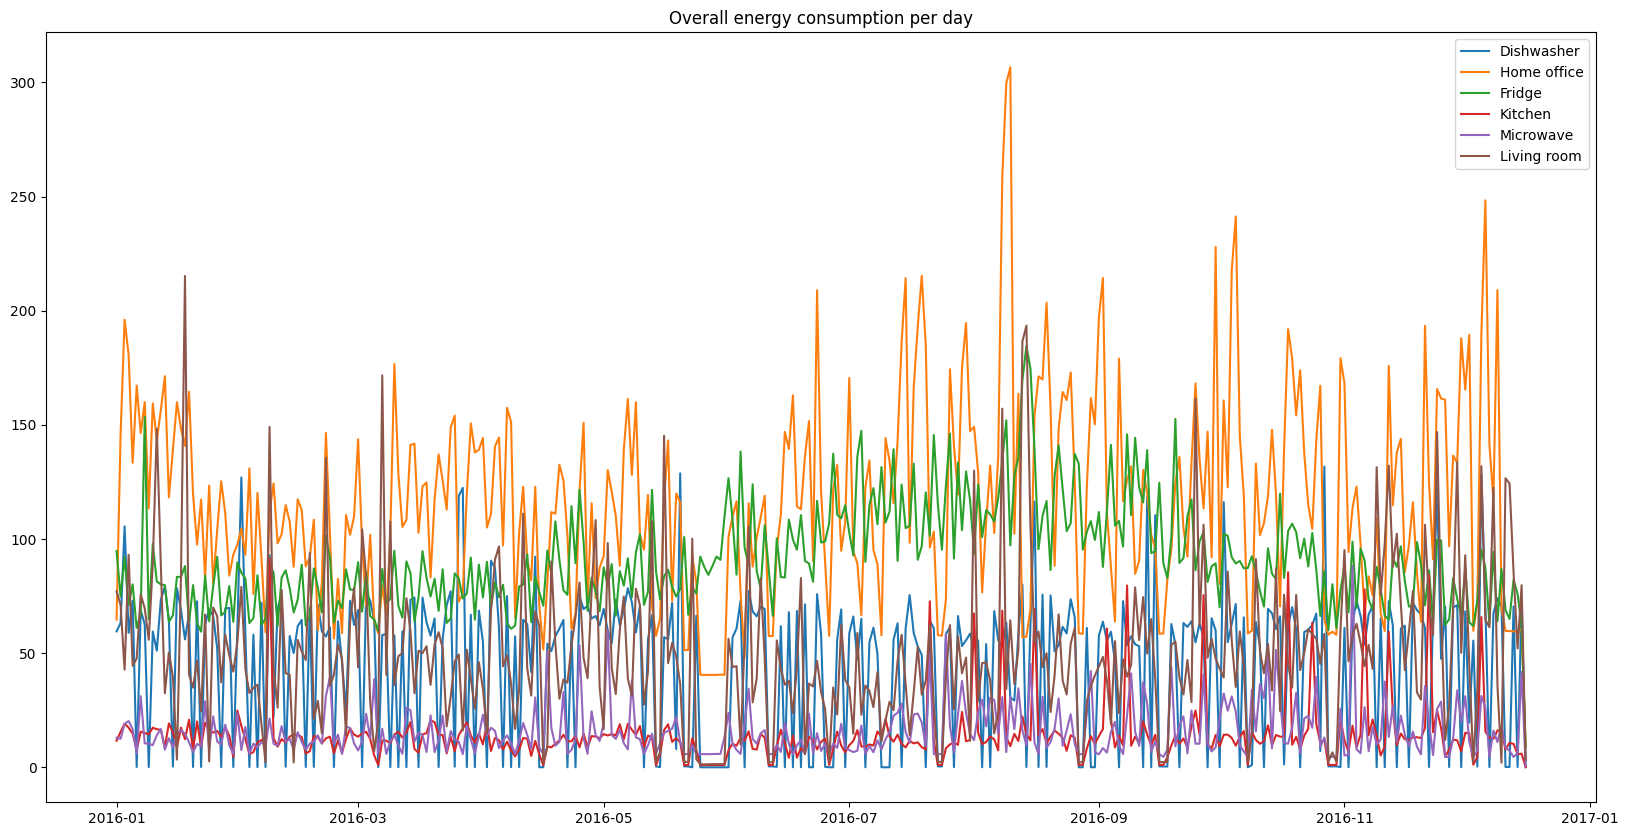

In [22]:
energy_per_day = energy_data.resample('D').sum()
plt.figure(figsize=(20,10))
plt.title("Overall energy consumption per day")
sns.lineplot(data = energy_per_day.filter(items=[ 'Dishwasher', 'Home office', 'Fridge', 'Kitchen','Microwave', 'Living room']), dashes=False)
#'Dishwasher', 'Furnace', 'Home office', 'Fridge','Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well','Microwave', 'Living room'

<Axes: title={'center': 'Overall energy consumption per day'}>

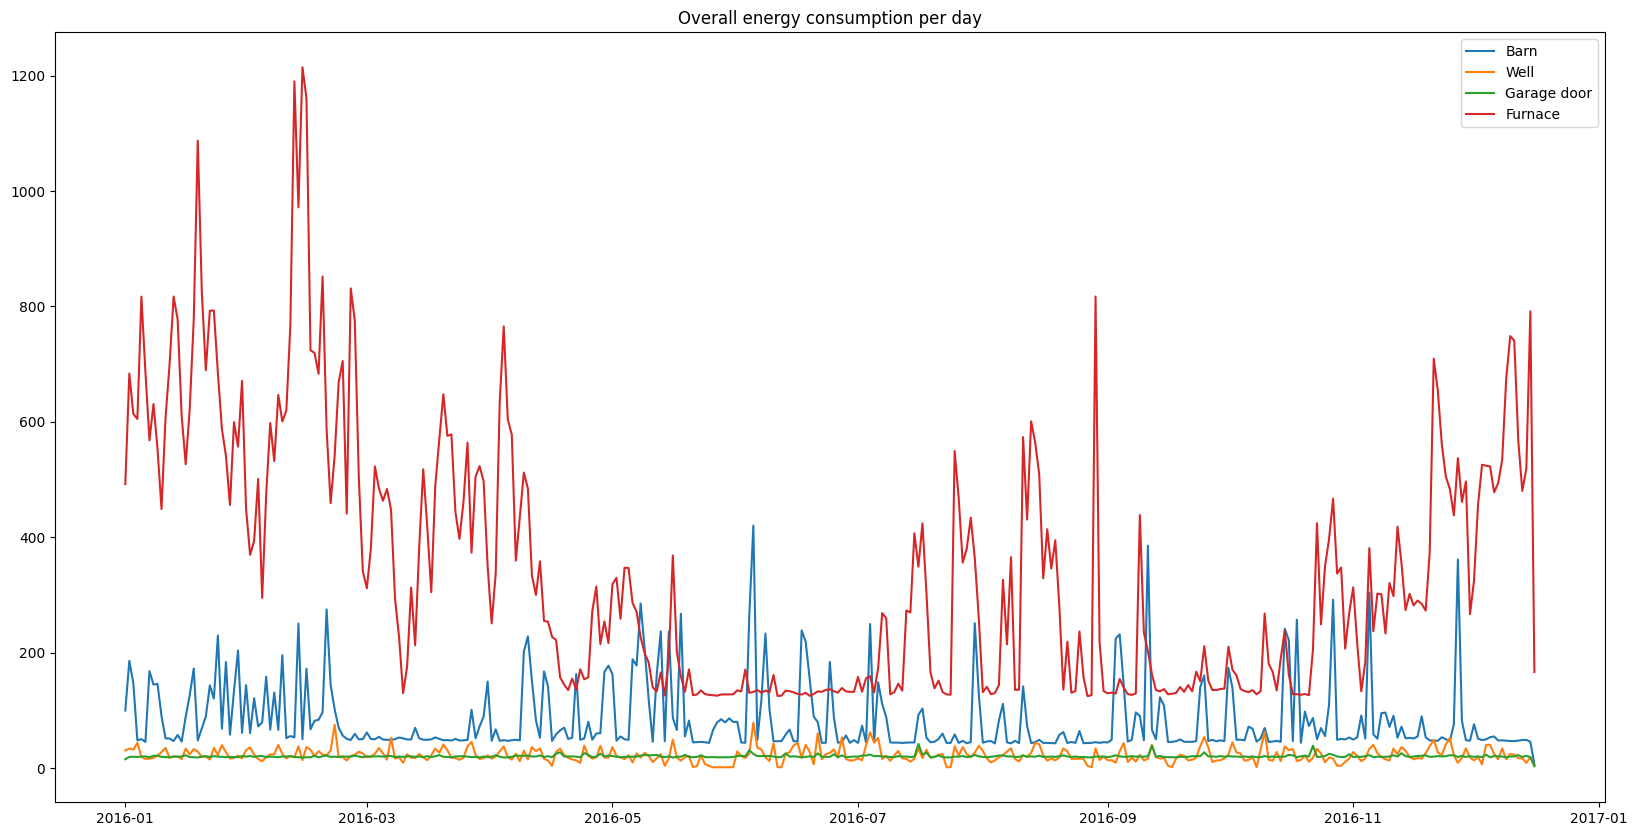

In [23]:
energy_per_day = energy_data.resample('D').sum()
plt.figure(figsize=(20,10))
plt.title("Overall energy consumption per day")
sns.lineplot(data = energy_per_day.filter(items=[ 'Barn', 'Well', 'Garage door',  'Furnace']), dashes=False)
#'Dishwasher', 'Furnace', 'Home office', 'Fridge','Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well','Microwave', 'Living room'

<Axes: >

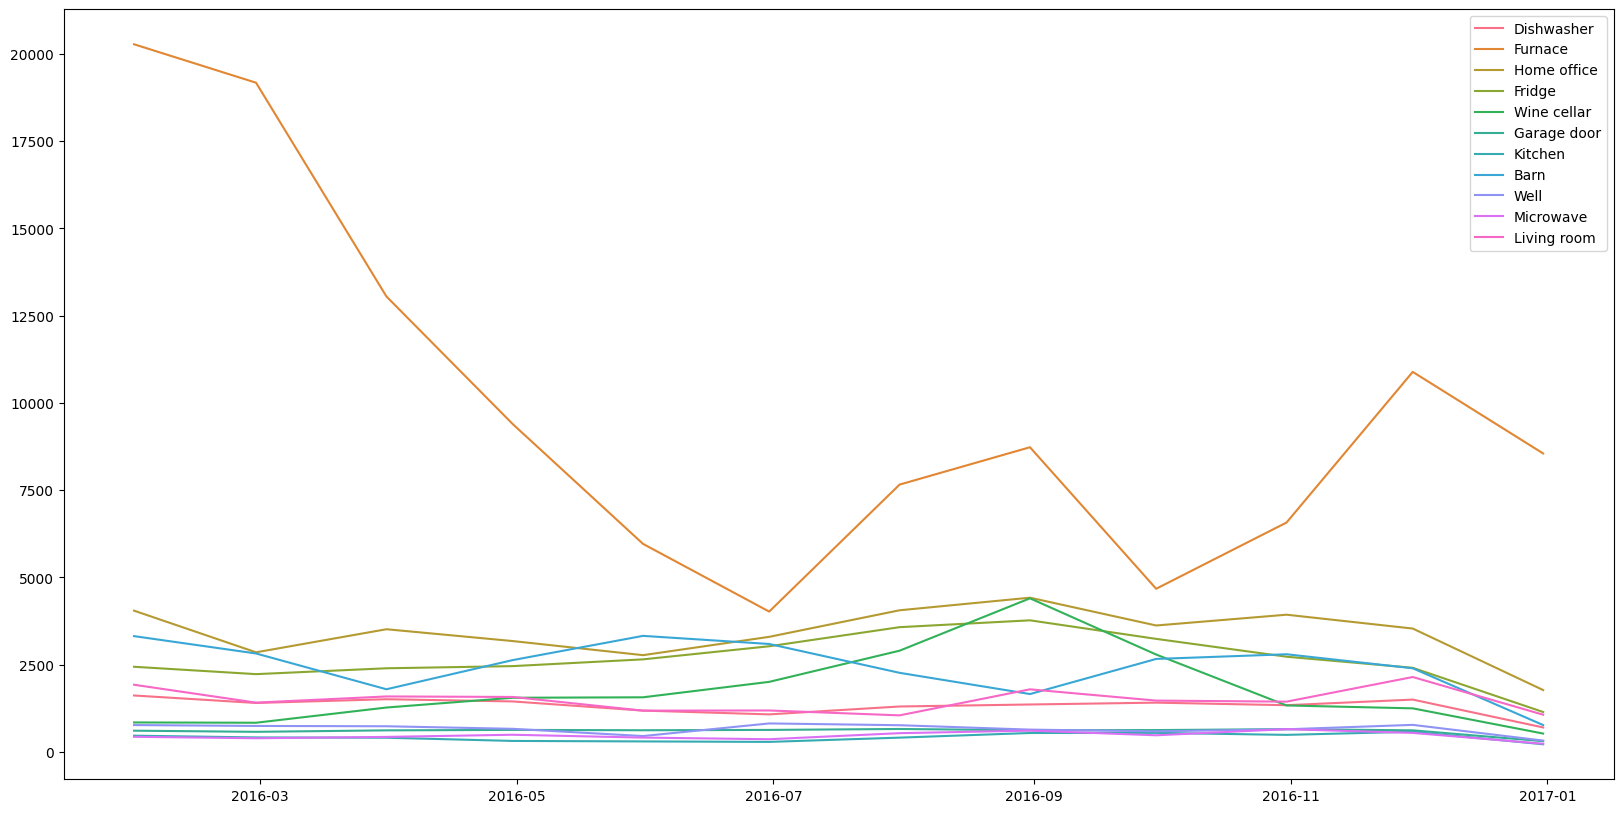

In [24]:
energy_per_month = energy_data.resample('M').sum() # for energy we use sum to calculate overall consumption in period
plt.figure(figsize=(20,10))
sns.lineplot(data= energy_per_month.filter(items=[  'Dishwasher', 'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']) , dashes=False  )

<Axes: xlabel='House overall', ylabel='temperature'>

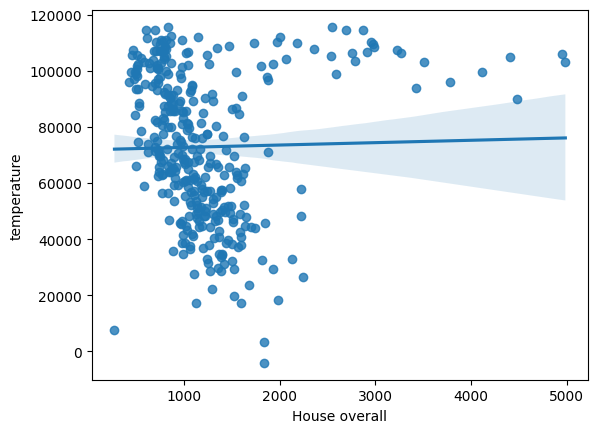

In [25]:
energy_per_day = energy_data.resample('D').sum()
sensor_per_day = sensor_data.resample('D').sum()
sns.regplot(x=energy_per_day['House overall'], y= sensor_per_day['temperature'])

<Axes: xlabel='Kitchen', ylabel='temperature'>

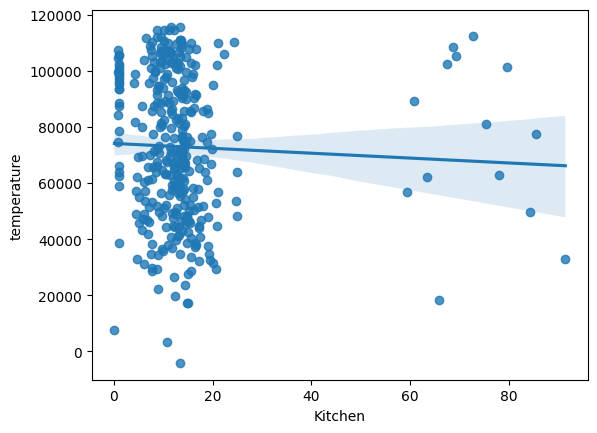

In [26]:
sns.regplot(x=energy_per_day['Kitchen'], y= sensor_per_day['temperature'])

<Axes: xlabel='Fridge', ylabel='temperature'>

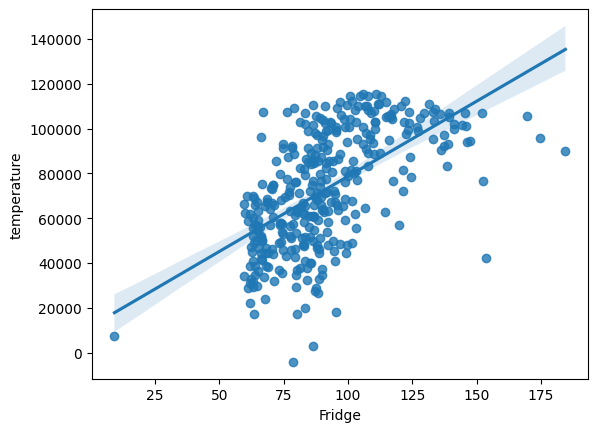

In [27]:
sns.regplot(x=energy_per_day['Fridge'], y= sensor_per_day['temperature'])

<Axes: xlabel='Furnace', ylabel='temperature'>

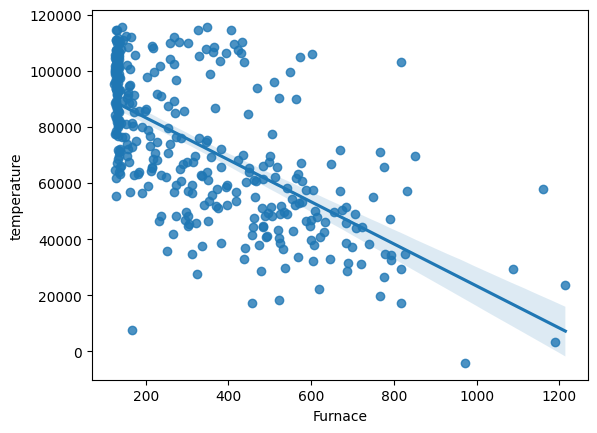

In [28]:
sns.regplot(x=energy_per_day['Furnace'], y= sensor_per_day['temperature'])

In [29]:
combined_data = pd.concat([energy_data, sensor_data], axis=1)

In [30]:
combined_data.dropna(inplace=True)

In [31]:
X = combined_data.drop('House overall', axis=1)  # Features
y = combined_data['House overall']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred_lr = model_lr.predict(X_test_scaled)

In [35]:
mse_lr = mean_squared_error(y_test, y_pred_lr)

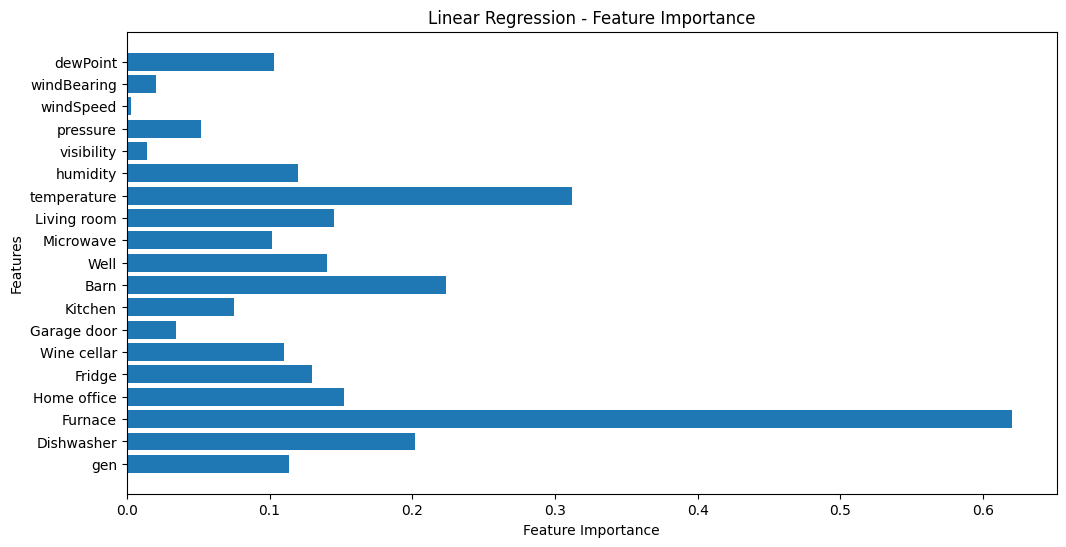

In [36]:
feature_importance_lr = np.abs(model_lr.coef_)
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance_lr)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Linear Regression - Feature Importance')
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [ ]:
# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf}")

Random Forest R-squared: 0.9721649392555222


In [ ]:
# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR R-squared: {r2_svr}")

In [38]:
# K-Nearest Neighbors Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors R-squared: {r2_knn}")

K-Nearest Neighbors R-squared: 0.9157151225896871


In [40]:
# Multi-layer Perceptron (Feedforward Neural Network)
from keras.models import Sequential
from keras.layers import Dense

model_fnn = Sequential()
model_fnn.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dense(1))  # Output layer with linear activation

model_fnn.compile(optimizer='adam', loss='mean_squared_error')
model_fnn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_fnn = model_fnn.predict(X_test_scaled)
r2_fnn = r2_score(y_test, y_pred_fnn)
print(f"FNN R-squared: {r2_fnn}")

Epoch 1/20
12598/12598 [==============================] - 43s 3ms/step - loss: 0.1629
Epoch 2/20
12598/12598 [==============================] - 28s 2ms/step - loss: 0.1133
Epoch 3/20
12598/12598 [==============================] - 29s 2ms/step - loss: 0.0980
Epoch 4/20
12598/12598 [==============================] - 28s 2ms/step - loss: 0.0904
Epoch 5/20
12598/12598 [==============================] - 29s 2ms/step - loss: 0.0860
Epoch 6/20
12598/12598 [==============================] - 30s 2ms/step - loss: 0.0813
Epoch 7/20
12598/12598 [==============================] - 29s 2ms/step - loss: 0.0792
Epoch 8/20
12598/12598 [==============================] - 30s 2ms/step - loss: 0.0768
Epoch 9/20
12598/12598 [==============================] - 28s 2ms/step - loss: 0.0745
Epoch 10/20
12598/12598 [==============================] - 31s 2ms/step - loss: 0.0731
Epoch 11/20
12598/12598 [==============================] - 32s 3ms/step - loss: 0.0713
Epoch 12/20
12598/12598 [===========================